DAT405 Assignment 3

Theodor Jendle - 9901134339 - 

Carl Hjalmarsson - 9305198930 - 

In [5]:
import nbdime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

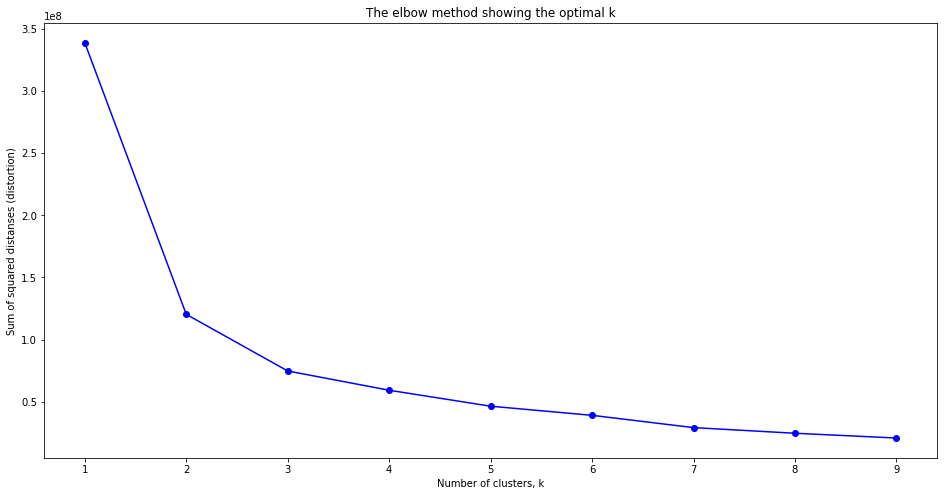

In [6]:
protein_data = pd.read_csv("assignment3-data.csv", index_col = False)
angle_data = protein_data[['phi', 'psi']]

# inspired by https://predictivehacks.com/k-means-elbow-method-code-for-python/
sumsquares = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(angle_data)
    sumsquares.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, sumsquares, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Sum of squared distanses (distortion)')
plt.title('The elbow method showing the optimal k')
plt.show()

### Problem 2 a)
The inertia is defined as the sum of the sum of squared distances for every point to its respective center. Using this as a measurement for the tightness of the clustering, and plotting for different values of k, we can see where the graph changes slope the most, in this case at k=2. This means that the tightness of the clusters doesn't change as much after this point, indicating that the optimal number of clusters is indeeed k=2. 

Note: Since the unit circle is defined for values between -180 to 180 degrees, the distance between say an angle of -170 degrees and 190 degrees is 20. The K-means model has no information about the nature of the data. This means that points in our data that actually are close to each other are interpreted as being far apart, and is an issue that needs correction.

In [7]:
twomeans = KMeans(n_clusters=2, random_state=0).fit(angle_data)
silhouette_score_k2 = silhouette_score(angle_data, twomeans.labels_)
print('Silhouette score (k=2): ', silhouette_score_k2)

threemeans = KMeans(n_clusters=3, random_state=0).fit(angle_data)
silhouette_score_k3 = silhouette_score(angle_data, threemeans.labels_)
print('Silhouette score (k=3): ', silhouette_score_k3)

Silhouette validation score for k=2:  0.6328209708884562
Silhouette validation score for k=3:  0.6724895253169637


### 2 b)
As we can see the score is mediocre for both k=2 and k=3, as the greatest value the silhouette score can take on is 1. The reason for this is because the data is not formatted to our needs, as mentioned in **problem 2 a)**.

### 2 c)
Since the validation score is consistently higher for k=3, we can deduce that this is actually a better choice for this hyperparameter, i.e. implicating that the clusters found in **a)** are not the optimal ones. This can also be found from visual inspection of the scatter plot in **problem 3.1**, together with the information that the graph wraps around the y axis in the lower left quadrant of the image, as discussed in **problem 2 a)**.

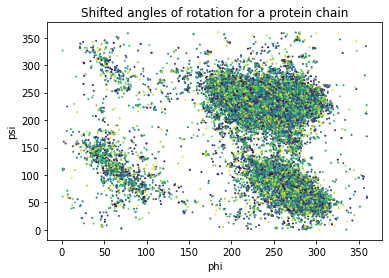

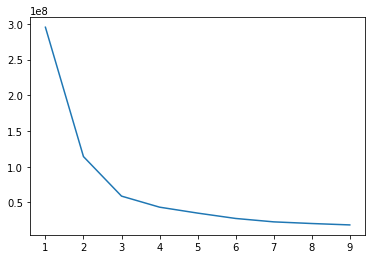

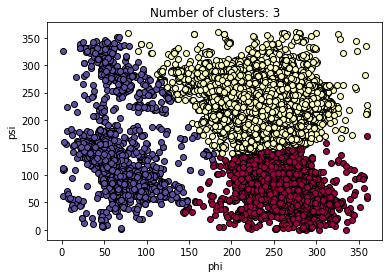

Silhouette score (shifted, k=3): 0.6827124596247838
 Difference with (unshifted, k=2): 0.04989148873632754


In [19]:
shifted_angles = angle_data.copy(deep=True)
shifted_angles["phi"] = shifted_angles["phi"] + 350
shifted_angles["psi"] = shifted_angles["psi"] + 95
shifted_angles = shifted_angles.mod(360, axis = 1)
N = len(shifted_angles)
colors = np.random.rand(N)
plt.scatter(shifted_angles['phi'], shifted_angles['psi'], c = colors, s=1)
plt.xlabel("phi")
plt.ylabel("psi")
plt.title("Shifted angles of rotation for a protein chain")
plt.show()
sumsquares = []

for k in K:
    kmeans_shifted = KMeans(n_clusters=k, random_state=0).fit(shifted_angles)
    sumsquares.append(kmeans_shifted.inertia_)

plt.plot(K, sumsquares)
plt.show()

# Code below inspired by module 3 materials which in turn is based on https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
n_clusters_ = 3
threemeans_shifted = KMeans(n_clusters=n_clusters_, random_state = 0).fit(shifted_angles)

labels_shifted = threemeans_shifted.labels_
core_samples_mask = np.zeros_like(labels_shifted, dtype=bool) 

label_indices = [i for i in range(len(labels_shifted))]
core_samples_mask[label_indices] = True

unique_labels = set(labels_shifted) 
colors = [plt.cm.Spectral(each) 
          for each in np.linspace(0, 1, len(unique_labels))] 
for k, col in zip(unique_labels, colors): 
    class_member_mask = (labels_shifted == k) 
    phi_psi = shifted_angles[class_member_mask & core_samples_mask] 
    plt.plot(phi_psi["phi"], phi_psi["psi"], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=6) 
    phi_psi = shifted_angles[class_member_mask & ~core_samples_mask] 
    plt.plot(phi_psi["phi"], phi_psi["psi"], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=0.8) 
plt.title('Number of clusters: %d' % n_clusters_)
plt.xlabel("phi")
plt.ylabel("psi") 
plt.show()

silhouette_score_shifted = silhouette_score(shifted_angles, labels_shifted)
print("Silhouette score (shifted, k=3): {}\n Difference with (unshifted, k=2): {}".format(silhouette_score_shifted, silhouette_score_shifted-silhouette_score_k2))
